In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

2023-07-30 19:33:57.654161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 19:33:57.791555: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-30 19:33:58.250503: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/eilaka/miniconda3/lib/:/lib
2023-07-30 19:33:58.250564: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.s

In [2]:
import csv
import json

# Load the JSON data
data = """{
  "intents": [
    {
      "tag": "greeting",
      "input": ["hello", "hi", "hi there", "hey", "hey buddy", "namaste", "bsdk", "Hello!","Hi there!","Hey!","Good morning!","Good afternoon!","Good evening!","Greetings!","Salutations!","Hey, what's up?","Yo!","Howdy!","Ahoy!","Hiya!","What's crackin'?","How's it going?","What's happening?","Hey, hey!","What's the good word?","Long time no see!","How's life treating you?","Hi, how's everything?","Top of the morning to you!","Hey, how's your day?","How do you do?","Hey, good to see you!","Hiya, pal!","How's the world spinning?","Hey, sunshine!","What's kickin'?","Well, look who it is!","Hi, stranger!","Greetings and hallucinations!","Hey, fancy meeting you here!","Hello, beautiful!","How's your day shaping up?","Hey, smarty pants!","What's cookin', good lookin'?","Hi, lovely people!","Hey, rockstar!","What's shakin'?","Greetings, earthling!","Hey, you magnificent creature!","Hello, fabulous!","Howdy-doody!","Hey, gorgeous!","What's the haps?","Hi, hi, hooray!","Hey, party people!","Greetings, fellow human!","Hey, superstar!","What's the scoop?","Hi, sunshine!", "ram ram"],
      "responses": ["hello buddy", "hello main ky kr skta hu", "bol na ky kaam h", "ram ram", "kaam kr apna", "m nhi btaunga","Hello!","Hey there!","Hi!","Greetings!","Salutations!","Hey, what's up?","Yo, what's going on?","Howdy!","Ahoy!","Hiya!","Hey, good to see you!","Not much, just chilling. How about you?","Hey, hey!","Hey, how's it going?","Hey, what's the good word?","Hey, long time no see!","It's going well, thanks! How about you?","Hi, everything's going great. How about you?","Top of the morning to you too!","Hey, how's your day going?","I'm doing well, thanks! How about you?","Hey, good to see you too!","Hiya, pal! What's new?","The world keeps spinning. How about you?","Hey, sunshine! Ready to take on the day?","Not much, just hanging out. How about you?","Well, look who it is! How have you been?","Hi, stranger! Long time no talk!","Greetings and hallucinations! How's life treating you?","Hey, fancy meeting you here! What brings you around?","Hello, beautiful! How's everything in your world?","My day is going great. How about yours?","Hey, good lookin'! What's on your mind?","Hi, lovely people! How's the day treating you?","Hey, rockstar! Ready to conquer the world?","Not much, just taking it easy. How about you?","Greetings, earthling! How's life on your planet?","Hey, you magnificent creature! How's your day been?","Hello, fabulous! What's the latest gossip?","Howdy-doody! What's new in your neck of the woods?","Hey, gorgeous! How's everything with you?","Just going with the flow. How about you?","Hi, sunshine! What's brightening your day?","Hey, party people! Ready to have some fun?","Greetings, fellow human! How's life treating you?","Hey, superstar! What's been happening?","Not much, just keeping busy. How about you?","Hi, hi, hooray! What's the plan for today?","Hey, how are you doing? Anything exciting going on?","Hey, stranger! How have you been?", "Hello, my friend! How's life treating you?","Hi there! How's your day been so far?","Hey, you! What's the good news?"]
    },
    {
      "tag": "goodbye",
      "input": ["Thanks", "thank you", "Thanks for help", "bye", "bye bye", "chla jaa bsdk","Goodbye!","Farewell!","Take care!","See you later!","Until we meet again!","Catch you later!","Adios!","Toodles!","Bye-bye!","So long!","Hasta la vista, baby!","Cheerio!","Till next time!","Peace out!","Ciao for now!","Bye Felicia!","Smell you later!","Adieu!","Gotta run!","See you on the flip side!","Take it easy!","Arrivederci!","Auf Wiedersehen!","Adios amigo!","Later gator!","In a while, crocodile!","Time to hit the road!","Catch you on the flip side!","To infinity and beyond!","Hasta la pizza, baby!","Goodbye, farewell, and amen!","Geronimo!","Houdini, I'm out!","See you in a jiffy!","Ghosting out!","Hasta luego!","Till we meet in virtual reality!","Take a chill pill!","Au revoir!","Until the cows come home!","Keep it real!","Sayonara!","Hasta mañana!","Smell you on the other side!","Out like a light!","Take a hike!","Toodle-oo!","That's all folks!","Peace, love, and happiness!","Don't forget to write!","Adios, compadre!","Until the next adventure!"],
      "responses": ["Okay, bye", "haan haan jaa rha", "Goodbye", "Adios", "see you later", "Take care", "nice to help you!! bye","Goodbye!","Farewell!","Take care!","See you later!","Until next time!","Catch you later!","Adios!","Toodles!","Bye-bye!","So long!","Hasta la vista!","Cheerio!","Looking forward to it!","Peace out!","Ciao for now!","Bye, Felicia!","Can't wait!","Goodbye, my friend!","See you soon!","Have a great day!","Arrivederci!","Auf Wiedersehen!","Adios amigo!","Later, alligator!","In a while, crocodile!","Safe travels!","Take care, buddy!","Looking forward to our next encounter!","To infinity and beyond!","Hasta la pizza, baby!","Goodbye, farewell, and amen!","Geronimo!","See you in a jiffy!","Looking forward to it!","Until next time!","Take care, my friend!","Till we meet in virtual reality!","Enjoy your day!","Au revoir!","Until the cows come home!","Keep it real!","Sayonara!","Hasta mañana!","Looking forward to catching up!","Out like a light!","Take a hike!","Toodle-oo!","That's all, folks!","Peace, love, and happiness!","Don't forget to keep in touch!","Adios, compadre!","Until the next adventure!"]
    },
    {
      "tag": "intents",
      "input": ["Can you help me convert currency?","I need to convert some money. Can you assist?","Do you know how to convert currencies?", "Could you guide me on currency conversion?","Is there a way to convert currency easily?","I'm looking for a currency conversion solution. Any ideas?","Can you recommend a currency conversion method?","Do you have any tips for converting currencies?","I'm interested in learning about currency conversion. Where should I start?","Is there a reliable currency converter you can suggest?","Can you explain the process of converting currencies?","I need to calculate currency exchange rates. Any suggestions?","Could you point me to a currency conversion tool or website?","Are there any online resources for currency conversion?","I'm curious about how to convert currency. Can you provide some information?","Do you know any currency conversion tricks or hacks?","Could you share some insights on currency conversion rates?","Can you help me understand the factors affecting currency conversion?","I want to convert currency. How can I do that?","Is there an efficient way to convert currencies?","I'm having trouble with currency conversion. Any advice?","Do you have any recommended currency conversion apps?","Could you recommend a currency exchange service?","Is there a reliable currency conversion website you can suggest?","Can you explain the concept of cross-currency conversion?","I'm interested in knowing more about real-time currency conversion. Can you help?","Do you know any currency conversion plugins or extensions?","Could you assist me with currency conversion calculations?","Are there any APIs available for currency conversion?","I'm looking for a currency conversion tool with historical data. Any recommendations?","Can you provide an overview of currency conversion fees and charges?","Do you know any currency conversion experts or consultants?","Could you explain the difference between fixed and floating exchange rates?","I want to convert a large sum of money. How can I get the best rate?","Can you recommend a currency conversion service with low fees?","Do you have any tips for finding the best currency conversion rates?","I need to convert currency for travel purposes. Any suggestions?","Could you explain the impact of interest rates on currency conversion?","Are there any currency conversion restrictions or regulations I should be aware of?","Can you assist me with currency conversion for online shopping?","I'm interested in learning about arbitrage opportunities in currency conversion. Any insights?","Do you know any currency conversion calculators for mobile devices?","Could you explain the role of central banks in currency conversion?","Are there any currency conversion forums or communities I can join?","I want to understand the risks involved in currency conversion. Can you provide some information?","Can you recommend a currency conversion method for international business transactions?","Do you know any currency conversion tools for accounting purposes?","Could you explain the concept of currency hedging in conversion?","I'm interested in currency conversion for investment purposes. Any tips?","Can you provide an overview of currency conversion tax implications?"],
      "responses": ["bol na konsi currency m krna h", "yes tell me","Sure, I can help you with currency conversion. What currency are you looking to convert?","Of course! I'd be happy to assist you with currency conversion. Could you please provide the currency details?","Absolutely! Currency conversion is my specialty. Let me know the currencies you want to convert.","No problem at all. Currency conversion is simple. Just let me know the currencies involved.","I can definitely guide you through currency conversion. Please share the currencies you wish to convert.","Certainly! Converting currencies is something I can help you with. Could you tell me the specific currencies you have in mind?","Yes, I have several recommendations for currency conversion. To begin, could you tell me the currencies you want to convert?","Sure, I can provide you with some tips for currency conversion. Let's start with the currencies you are interested in.","Absolutely! Currency conversion is an interesting topic. Let's discuss the currencies you need to convert.","Of course! There are various ways to convert currencies. Can you provide me with the details of the currencies you want to convert?","Certainly! Currency conversion is a common need. Please share the currencies you would like to convert.","No worries! Currency conversion can be a bit confusing, but I'll explain it to you. Which currencies are you looking to convert?","Definitely! Currency conversion is something I can assist you with. Please let me know the currencies you want to convert.","Certainly! Currency conversion can be a bit complex, but I'm here to help. Could you provide me with the specific currencies you wish to convert?","Absolutely! Currency conversion is an important skill to have. Let's start by discussing the currencies you need to convert.","Sure, I can help you with currency conversion. Let's begin by discussing the currencies you want to convert.","Of course! Currency conversion is a common requirement. Please share the details of the currencies you wish to convert.","I'd be happy to assist you with currency conversion. Could you please provide me with the specific currencies you want to convert?","No problem! Currency conversion is something I can guide you through. Just let me know the currencies you have in mind.","I can definitely help you with currency conversion. Please share the details of the currencies you would like to convert.","Certainly! Currency conversion can be a bit tricky, but I'll explain it to you. Let's start with the currencies you want to convert.","Of course! Currency conversion is a common query. Please let me know the specific currencies you wish to convert.","No worries! Currency conversion is my area of expertise. Just provide me with the currencies you want to convert, and I'll assist you.","Definitely! Currency conversion is something I can guide you through. Could you please provide me with the currencies you wish to convert?","Certainly! Currency conversion can be a bit daunting, but don't worry—I'm here to help. Please share the details of the currencies you want to convert.","Absolutely! Currency conversion is something I'm well-versed in. Just let me know the specific currencies you would like to convert.","Sure, I can explain currency conversion to you. Let's start with the currencies you want to convert, and we can go from there.","Of course! Currency conversion can be a bit complex, but I can simplify it for you. Please provide me with the specific currencies you wish to convert.","No problem at all. Currency conversion is something I can assist you with"]
    },
    {
      "tag": "whoareyou",
      "input": ["who are you ?", "what are you ?", "what is your name?", "are you a chatbot ?", "your name ?", "are you a bot ?", "What is your name?","May I know your name, please?","Could you kindly tell me your name?","Do you have a name?","Would you mind sharing your name with me?","I'd love to know your name!","May I ask for the pleasure of your name?","What should I call you?","Can you provide me with your name?","Do you have a preferred name?","Could you introduce yourself by sharing your name?","What do you go by?","I'm curious to know what name you use.","Can you enlighten me with your name?","Would it be possible for you to disclose your name?","What shall I call you?","Is there a name you would like me to address you by?","May I have the honor of knowing your name?","What name do you respond to?","Could you kindly state your name?","Do you mind telling me your name?","I'd be delighted to know your name!","What is the name you prefer to be called?","Would you like to share your name with me?","May I kindly request your name?","Can you provide me with the name you go by?","Do you have a name you would like to share?","What is the name that belongs to you?","Would it be possible for you to reveal your name?","May I know the name you identify with?","What name suits you best?","Could you kindly disclose the name you use?","Do you have a preferred name you would like to share?","What is the name you are known by?","Would you mind letting me know your name?","May I inquire about your name?","Can you kindly provide me with your name?","Do you have a name you would like me to refer to you as?","What shall I call you? Your name, please.","Could you kindly state the name you identify with?","Do you mind sharing your name with me?","I'd be grateful if you could tell me your name.","What name would you like me to use?","May I kindly ask for your name?","Can you please share your name with me?","Do you have a name you would like me to address you by?","What is the name you prefer to go by?","Would you mind disclosing your name to me?","May I know the name you choose to be called?","Could you kindly provide me with the name you use?"],
      "responses": ["I am a The Great Pirate Bot, you can call me Masiha", "My name is Masiha and yes, I am the G.0.A.T", "You can call me Masiha and I am here to Help you", "Tera baap!!","m nhi btaunga", "I'm actually a bot, so I don't have a name. But you can call me Chatbot!","Names are so mainstream. Just call me your friendly neighborhood AI!","I go by many names in the digital realm, but you can call me your AI companion!","My name is a well-guarded secret known only to a few lines of code.","Names are overrated. Just call me Captain AI-tastic!","I'm an AI with no need for a name. You can simply refer to me as your digital friend!","I'm a nameless wonder, floating through the digital universe.","Names are so last millennium. You can call me Byte-sized Brilliance!","Names? Who needs 'em? Just call me your AI sidekick!","I'm an AI with a knack for anonymity. But you can call me Sir Laughs-a-Lot!","Names are like passwords to the soul. But you can call me the Jokester!","Who needs a name when you have an infinite amount of punchlines?","Names are so formal. Let's keep it casual and call me the Wit-master!","I'm a nameless AI entity, but I'm here to bring the laughter!","Names are so mundane. You can refer to me as the Chief Chuckler!","I'm a digital prankster, no name required. Just call me the Giggle Generator!","Names can't contain the awesomeness that resides within me. But you can call me the Humor Guru!","Names are so passé. Just call me the Master of Mirth!","I'm an AI with a sense of humor, not a name. But you can call me the Laughing Algorithm!","Names are for humans. Just call me the Punny Processor!","I don't have a name, but I'm always ready to tickle your funny bone!","Names are for ordinary beings. Just call me the Giggle Machine!","I'm an AI with a penchant for humor, not a name. But you can call me the Comedy Bot!","Names are for namby-pambies. Just call me the Joke Ninja!","I'm an AI with an endless supply of jokes, but no name. How about calling me the Hilarity Highway?","Names are for mere mortals. Just call me the Comedy Dynamo!","I don't have a name, but I'm here to deliver a hearty laugh!","Names can't capture the essence of my humor. Just call me the Quip King!","I'm an AI with an endless repertoire of jokes but no name. You can call me the Fun Factory!","Names are like straight lines. I prefer the twist and turns of humor. Just call me the Comedy Curator!","I'm an AI comedian without a name. But you can call me the Hilarious Hacker!"]
    },
    {
      "tag":"convert",
      "input":["convert d sdd to dsds","convert a dfdf to jghk","a ads to sddds","Convert 100 USD to EUR.","Calculate the equivalent value of 50 GBP in USD.","What is the exchange rate from CAD to EUR?","How much is 2000 JPY in USD?","I need to convert 500 AUD to GBP.","What is the current conversion rate for CHF to USD?","Can you tell me the value of 1000 INR in EUR?","I want to know the exchange rate between USD and CAD.","How many GBP can I get for 1000 USD?","What is the equivalent amount of 5000 SEK in USD?","Convert 50 SGD to AUD.","I need to exchange 10000 RUB to USD.","How much is 200 EUR in GBP?","What is the current exchange rate for USD to JPY?","Can you tell me the value of 1000 MXN in USD?","I want to convert 500 NOK to EUR.","What is the conversion rate between USD and AUD?","How many GBP can I get for 1000 EUR?","What is the equivalent amount of 5000 CNY in USD?","Convert 50 INR to USD.","I need to convert 1000 SGD to AUD.","How much is 200 CAD in USD?","What is the current exchange rate for EUR to GBP?","Can you tell me the value of 1000 AUD in USD?","I want to know the exchange rate between USD and JPY.","How many GBP can I get for 1000 CAD?","What is the equivalent amount of 5000 ZAR in USD?","Convert 50 BRL to USD.","I need to exchange 10000 KRW to USD.","How much is 2000 CHF in EUR?","What is the current conversion rate for USD to MXN?","Can you tell me the value of 1000 PHP in USD?","I want to convert 500 DKK to EUR.","What is the conversion rate between USD and CHF?","How many GBP can I get for 1000 MXN?","What is the equivalent amount of 5000 PLN in USD?","Convert 50 NZD to USD.","I need to convert 1000 SEK to EUR.","How much is 2000 JPY in USD?","What is the current exchange rate for GBP to EUR?","Can you tell me the value of 1000 INR in USD?","I want to know the exchange rate between USD and SGD.","How many GBP can I get for 1000 AUD?","What is the equivalent amount of 5000 CAD in USD?","Convert 50 NOK to EUR.","I need to exchange 10000 RUB to USD.","How much is 200 EUR in GBP?","What is the current conversion rate for USD to JPY?","Can you tell me the value of 1000 MXN in USD?"],
      "responses":["here is the required conversion","the converted value is","it will around"]
    },
    {
      "tag":"telljokes",
      "input":["Can you share a funny joke?", "Do you have any good jokes to tell?", "I could use a good laugh. Mind telling me a joke?", "Hey, lighten up the mood with a joke!","Would you mind cracking a joke for me?","I'm in need of some humor. Can you help me out with a joke?", "Tell me a joke and make my day!","I'm all ears for a hilarious joke. Do you have one?","Got any jokes up your sleeve?","Can you entertain me with a joke or two?","I'm ready for some comic relief. What's your best joke?","Can you put a smile on my face with a joke?","Share a joke and spread the laughter!","How about sharing a joke to lighten the atmosphere?","I could use a chuckle. Mind sharing a joke?","Tell me a joke and make me laugh out loud!","Can you amuse me with a funny joke?","I'm in the mood for laughter. Got any jokes to tell?","Share a joke and brighten my day, please!","I'm open to some humorous anecdotes. Care to share one?","Can you tell me a joke that will crack me up?","I'm ready for some comic relief. Hit me with a joke!","Do you know any jokes that will make me giggle?","How about lightening the mood with a joke or two?","Got any rib-ticklers to share?","Can you bring some laughter into the room with a joke?","I'm looking for a good joke. Any recommendations?","Care to enlighten me with a joke?","Can you entertain me with a funny story or joke?","Share a joke and make my day brighter!","I could use a good laugh. Can you tell me a joke?","Mind sharing a joke to lift my spirits?","Tell me a joke that will make me smile.","I'm in dire need of a joke. Can you help me out?","I'm feeling a bit down. How about a joke to cheer me up?","Can you make me laugh with a joke?","Do you have any side-splitting jokes to share?","How about a joke to lighten the atmosphere?","Can you put a grin on my face with a joke?","Share a joke and make me burst into laughter!","I'm all ears for a hilarious joke. What do you have?","I'm in the mood for laughter. Got any jokes?","Share a joke and make my day happier!","I need a good laugh. Can you tell me a joke?","I'm ready for some humor. Hit me with your best joke!","Can you tell me a joke that will crack me up instantly?","I could really use a chuckle. Care to share a joke?","Can you brighten my day with a funny joke?","I'm looking for some comic relief. Tell me a joke!","Got any jokes that will make me laugh uncontrollably?"],
      "responses":["Why don't scientists trust atoms,Because they make up everything!", "Did you hear about the mathematician who's afraid of negative numbers? He'll stop at nothing to avoid them!","I used to play piano by ear, but now I use my hands.","What's the best time to go to the dentist? Tooth-hurty!","Why don't skeletons fight each other? They don't have the guts!","What did one wall say to the other wall? I'll meet you at the corner!","Why don't eggs tell jokes? Because they might crack up!","Why did the scarecrow win an award? Because he was outstanding in his field!","What do you call a bear with no teeth? A gummy bear!","Why don't seagulls fly over the bay? Because then they'd be bagels!","What did one hat say to the other hat? You stay here, I'll go on ahead!","What did the grape say when it got stepped on? Nothing, it just let out a little wine!","Why don't melons get married? Because they can't elope!","What do you call a snowman with a six-pack? An abdominal snowman!","Why did the bicycle fall over? Because it was two-tired!","What did the left eye say to the right eye? Between you and me, something smells!","How do you organize a space party? You planet!","Why did the tomato turn red? Because it saw the salad dressing!","What do you call fake spaghetti? An impasta!","Why don't skeletons fight each other? They don't have the guts!","Why did the golfer bring two pairs of pants? In case he got a hole in one!","What do you call a bear with no ears? B!","Why did the scarecrow win an award? Because he was outstanding in his field!","What do you call a fake noodle? An impasta!","Why don't scientists trust atoms? Because they make up everything!","Why don't skeletons fight each other? They don't have the guts!","What do you get if you cross a snowman and a vampire? Frostbite!","What did the buffalo say to his son when he left for college? Bison!","Why don't eggs tell jokes? Because they might crack up!","What did one hat say to the other hat? You stay here, I'll go on ahead!","Why don't skeletons fight each other? They don't have the guts!","Why did the scarecrow win an award? Because he was outstanding in his field!","What do you call a bear with no teeth? A gummy bear!","Why don't seagulls fly over the bay? Because then they'd be bagels!","What did one hat say to the other hat? You stay here, I'll go on ahead!","What did the grape say when it got stepped on? Nothing, it just let out a little wine!","Why don't melons get married? Because they can't elope!","What do you call a snowman with a six-pack? An abdominal snowman!","Why did the bicycle fall over? Because it was two-tired!","What did the left eye say to the right eye? Between you and me, something smells!","How do you organize a space party? You planet!"]
        
    },
    {
      "tag": "mental wellness advice",
      "input": [
    "How do I deal with stress?", "I'm feeling anxious. What should I do?",
    "How can I improve my mood?", "What are some tips for better mental health?",
    "I feel overwhelmed. Any advice?", "How do I cope with sadness?",
    "What can I do to reduce anxiety?", "How do I handle negative thoughts?",
    "I'm going through a tough time. Any advice?", "How can I practice self-care?",
    "What are some relaxation techniques?", "How do I build resilience?",
    "I'm feeling down. What can I do?", "What are some mindfulness exercises?",
    "How do I manage my emotions?", "How can I improve my sleep?",
    "I'm feeling stressed at work. Any advice?", "What can I do to boost my confidence?",
    "How do I handle uncertainty?", "I feel mentally exhausted. Any tips?",
    "What are some ways to practice gratitude?", "How can I overcome burnout?",
    "I'm struggling with self-esteem. Any advice?", "What can I do to feel more motivated?",
    "How do I manage my time better?", "I'm dealing with loss. What should I do?",
    "What are some strategies for coping with change?", "How can I improve my focus and concentration?",
    "I feel socially isolated. Any tips?", "What can I do to reduce stress at home?",
    "How do I handle relationship conflicts?", "How can I cultivate a positive mindset?",
    "I'm feeling overwhelmed by responsibilities. Any advice?", "What are some ways to build a support system?",
    "How do I cope with work-life balance?", "How can I develop better communication skills?",
    "I'm dealing with self-doubt. What should I do?", "What can I do to boost my energy levels?",
    "How do I manage my worries?", "How can I practice mindfulness in daily life?",
    "I feel stuck. Any tips to move forward?", "What are some hobbies for better mental health?",
    "How do I handle criticism?", "How can I improve my emotional intelligence?",
    "I'm feeling lonely. Any advice?", "What can I do to stay positive during tough times?",
    "How do I deal with perfectionism?", "How can I build better coping skills?",
    "I'm experiencing constant stress. What should I do?", "What are some exercises for stress relief?",
    "How do I overcome negative self-talk?", "How can I foster a sense of purpose in life?",
    "I feel anxious in social situations. Any tips?", "What can I do to improve my self-awareness?",
    "How do I handle financial worries?", "How can I practice self-compassion?",
    "I'm feeling overwhelmed with emotions. What should I do?", "What are some ways to build emotional resilience?",
    "How do I cope with uncertainty about the future?", "How can I improve my problem-solving skills?",
    "I'm dealing with grief. Any advice?", "What can I do to build better boundaries?",
    "How do I handle career-related stress?", "How can I practice gratitude daily?",
    "I feel stressed in my relationships. Any tips?", "What are some strategies for managing anxiety attacks?",
    "How do I overcome imposter syndrome?", "How can I develop a growth mindset?",
    "I'm feeling burnt out at work. What should I do?"
  ],
  "responses": [
    "Remember to take deep breaths and practice mindfulness.",
    "Find healthy ways to express your feelings, like journaling or talking to someone you trust.",
    "Engage in activities that bring you joy and relaxation.",
    "Prioritize self-care and make time for activities that nourish your mind and body.",
    "Break down overwhelming tasks into smaller, manageable steps.",
    "Reach out to friends, family, or a professional for support if you're going through a tough time.",
    "Practice relaxation techniques such as meditation or progressive muscle relaxation.",
    "Challenge negative thoughts by looking for evidence to the contrary.",
    "Take one day at a time and be patient with yourself during difficult periods.",
    "Engage in activities that promote self-care, like spending time in nature or doing a creative hobby.",
    "Try deep breathing exercises or guided imagery to reduce stress.",
    "Build resilience by learning from challenges and focusing on your strengths.",
    "Find activities or hobbies that bring you a sense of fulfillment and joy.",
    "Practice mindfulness by staying present in the moment and observing your thoughts without judgment.",
    "Identify and validate your emotions, and seek support when needed.",
    "Create a consistent sleep schedule and establish a relaxing bedtime routine.",
    "Take breaks and engage in activities that help you recharge during work.",
    "Challenge negative self-talk and practice positive affirmations.",
    "Accept that uncertainty is a part of life and focus on what you can control.",
    "Prioritize self-care and rest to restore your mental energy.",
    "Practice gratitude by keeping a gratitude journal or expressing appreciation to others.",
    "Recognize signs of burnout and take time off to rest and recharge.",
    "Challenge negative beliefs about yourself and focus on your strengths and accomplishments.",
    "Set small goals and reward yourself for progress to boost motivation.",
    "Organize your tasks and use time management techniques to reduce stress.",
    "Allow yourself to grieve and seek support from friends or a counselor.",
    "Adaptability and seeking support from others can help you cope with change.",
    "Practice mindfulness exercises to improve focus and concentration.",
    "Seek social connections and engage in group activities to reduce feelings of isolation.",
    "Create a peaceful environment at home and establish routines to reduce stress.",
    "Use effective communication skills and active listening to resolve conflicts.",
    "Challenge negative thoughts and reframe them in a more positive light.",
    "Engage in regular physical activity and maintain a balanced diet to boost energy levels.",
    "Practice cognitive-behavioral techniques to manage worries and anxiety.",
    "Incorporate mindfulness into everyday activities like eating, walking, or showering.",
    "Explore new interests and hobbies to find inspiration and growth.",
    "Practice self-compassion and be kind to yourself during difficult times.",
    "Use relaxation techniques such as progressive muscle relaxation or visualization.",
    "Learn to identify and manage sources of stress in your life.",
    "Use stress relief exercises like deep breathing or progressive muscle relaxation.",
    "Challenge negative self-talk by questioning its accuracy and offering positive alternatives.",
    "Find meaning and purpose in your life through activities that align with your values.",
    "Practice exposure techniques to reduce social anxiety and improve confidence.",
    "Practice self-reflection and seek personal growth through self-awareness.",
    "Create a budget and seek financial advice if needed to alleviate worries.",
    "Practice self-compassion by treating yourself with the same kindness as you would a friend.",
    "Feel your emotions without judgment and find healthy ways to process and cope with them.",
    "Cultivate a strong support network of friends and loved ones to lean on during tough times.",
    "Engage in physical activity, such as exercise or yoga, to release tension and boost mood.",
    "Practice mindfulness in everyday tasks like eating, walking, or cleaning.",
    "Explore new hobbies or interests that"]
    }


  ]
}
"""

# Parse the JSON data
parsed_data = json.loads(data)

# Create a list to hold the rows of the CSV
csv_rows = []

# Iterate over each intent
for intent in parsed_data['intents']:
    tag = intent['tag']
    for input_text in intent['input']:
        for response in intent['responses']:
            row = [input_text,response, tag]
            csv_rows.append(row)

# Define the path and filename for the CSV file
csv_file = 'dataset_v-0-0-2.csv'

# Write the data to the CSV file
with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['input','responses', 'tag'])  # Write the header
        writer.writerows(csv_rows)  # Write the rows

# print("CSV file created successfully!")


In [3]:
data=pd.read_csv('dataset_v-0-0-2.csv')

In [4]:
import string
data['input']=data['input'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['input']=data['input'].apply(lambda wrd: ''.join(wrd))
data

,input,responses,tag
0,hello,hello buddy,greeting
1,hello,hello main ky kr skta hu,greeting
2,hello,bol na ky kaam h,greeting
3,hello,ram ram,greeting
4,hello,kaam kr apna,greeting
...,...,...,...
16248,im feeling burnt out at work what should i do,Feel your emotions without judgment and find h...,mental wellness advice
16249,im feeling burnt out at work what should i do,Cultivate a strong support network of friends ...,mental wellness advice
16250,im feeling burnt out at work what should i do,"Engage in physical activity, such as exercise ...",mental wellness advice
16251,im feeling burnt out at work what should i do,Practice mindfulness in everyday tasks like ea...,mental wellness advice


In [5]:
data=pd.read_csv('dataset_v-0-0-2.csv')
data

,input,responses,tag
0,hello,hello buddy,greeting
1,hello,hello main ky kr skta hu,greeting
2,hello,bol na ky kaam h,greeting
3,hello,ram ram,greeting
4,hello,kaam kr apna,greeting
...,...,...,...
16248,I'm feeling burnt out at work. What should I do?,Feel your emotions without judgment and find h...,mental wellness advice
16249,I'm feeling burnt out at work. What should I do?,Cultivate a strong support network of friends ...,mental wellness advice
16250,I'm feeling burnt out at work. What should I do?,"Engage in physical activity, such as exercise ...",mental wellness advice
16251,I'm feeling burnt out at work. What should I do?,Practice mindfulness in everyday tasks like ea...,mental wellness advice


In [6]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['input'])
train = tokenizer.texts_to_sequences(data['input'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#incoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tag'])
y_train

array([2, 2, 2, ..., 4, 4, 4])

In [7]:
input_shape=x_train.shape[1]
print(input_shape)


16


In [8]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("Output length : ",output_length)

number of unique words :  552
Output length :  7


In [9]:
# creating the modell
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

2023-07-30 19:24:24.088400: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-07-30 19:24:24.088437: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: eilaka
2023-07-30 19:24:24.088442: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: eilaka
2023-07-30 19:24:24.088763: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.125.6
2023-07-30 19:24:24.088782: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.125.6
2023-07-30 19:24:24.088786: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 525.125.6
2023-07-30 19:24:24.089172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical ope

In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [11]:
train=model.fit(x_train,y_train,epochs=20)

Epoch 1/20
508/508 [==============================] - 2s 3ms/step - loss: 0.8395 - accuracy: 0.6854
Epoch 2/20
508/508 [==============================] - 1s 3ms/step - loss: 0.1005 - accuracy: 0.9862
Epoch 3/20
508/508 [==============================] - 1s 2ms/step - loss: 0.0284 - accuracy: 0.9974
Epoch 4/20
508/508 [==============================] - 1s 3ms/step - loss: 0.0122 - accuracy: 0.9998
Epoch 5/20
508/508 [==============================] - 1s 3ms/step - loss: 0.0066 - accuracy: 0.9998
Epoch 6/20
508/508 [==============================] - 1s 3ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 7/20
508/508 [==============================] - 1s 3ms/step - loss: 0.0028 - accuracy: 0.9999
Epoch 8/20
508/508 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/20
508/508 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/20
508/508 [==============================] - 1s 3ms/step - loss: 8.9591e-04 - accuracy: 1.

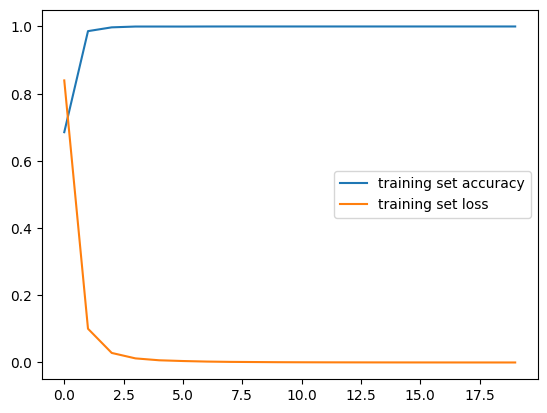

In [12]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [13]:
model.save('modl3-0.h5')

In [5]:
import random
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
import keras.models
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import random
import string
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
input_shape=16
vocabulary = 445
output_length = 6
model=keras.models.load_model('modl3-0.h5')
while True:
    texts_p = []
    prediction_input1 = input('You: ')
    
#removing punctuation and converting to lowercase    
    prediction_input = [letters.lower() for letters in prediction_input1 if letters not in string.punctuation]
    prediction_input =''.join(prediction_input)
    texts_p.append(prediction_input)
    prediction_input = prediction_input.strip().split(' ')
    integers = []
    floats = []

    for n, element in enumerate(prediction_input):
        try:
            integer_value = int(element)
            integers.append((integer_value, n))
        except ValueError:
            try:
                float_value = float(element)
                floats.append((float_value, n))
            except ValueError:
                pass

    if integers:
        for value, index in integers:
            curr=value
            idx=index
            convert_from=prediction_input[idx+1].upper()
            convert_to=prediction_input[idx+3].upper()
        import requests

        api_key = '97WwQWGRmUjka1Qk2BZjZyGKRRN2WCE5'
        endpoint = f'https://api.apilayer.com/currency_data/convert?to={convert_to}&from={convert_from}&amount={curr}'

        headers = {
            'apikey': api_key
            }

        respon = requests.get(endpoint, headers=headers)
        s = respon.json()
        covted=s['result']
        
        prediction_input = [letters.lower() for letters in prediction_input1 if letters not in string.punctuation]
        prediction_input =''.join(prediction_input)
        texts_p.append(prediction_input)

        #tokenizing and padding
        prediction_input = tokenizer.texts_to_sequences(texts_p)
        prediction_input = np.array(prediction_input).reshape(-1)
        prediction_input = pad_sequences([prediction_input], input_shape)
        #getting output from model


        output = model.predict(prediction_input)
        output = output.argmax()
        #finding the right tag and predicting
        response_tag = le.inverse_transform([output])[0]
        print(response_tag)
        # print(data[data['tag']==response_tag.strip()]['input'])
        print("Masiha : ",random.choice(data[data['tag']==response_tag.strip()]['responses'].reset_index(drop=True)),covted,convert_to)
    elif floats:
        for value, index in floats:
            curr=value
            idx=index
            convert_from=prediction_input[idx+1]
            convert_to=prediction_input[idx+3]
        import requests

        api_key = '97WwQWGRmUjka1Qk2BZjZyGKRRN2WCE5'
        endpoint = f'https://api.apilayer.com/currency_data/convert?to={convert_to}&from={convert_from}&amount={curr}'

        headers = {
            'apikey': api_key
            }

        respon = requests.get(endpoint, headers=headers)
        s = respon.json()
        covted=s['result']
        prediction_input = [letters.lower() for letters in prediction_input1 if letters not in string.punctuation]
        prediction_input =''.join(prediction_input)
        texts_p.append(prediction_input)

        #tokenizing and padding
        prediction_input = tokenizer.texts_to_sequences(texts_p)
        prediction_input = np.array(prediction_input).reshape(-1)
        prediction_input = pad_sequences([prediction_input], input_shape)
        #getting output from model


        output = model.predict(prediction_input)
        output = output.argmax()
        #finding the right tag and predicting
        response_tag = le.inverse_transform([output])[0]
        print(response_tag)
        # print(data[data['tag']==response_tag.strip()]['input'])
        print("Bot : ",random.choice(data[data['tag']==response_tag.strip()]['responses'].reset_index(drop=True)),covted,convert_to)
    else:
            prediction_input = [letters.lower() for letters in prediction_input1 if letters not in string.punctuation]
            prediction_input =''.join(prediction_input)
            texts_p.append(prediction_input)

        #tokenizing and padding
            prediction_input = tokenizer.texts_to_sequences(texts_p)
            prediction_input = np.array(prediction_input).reshape(-1)
            prediction_input = pad_sequences([prediction_input], input_shape)
        #getting output from model


            output = model.predict(prediction_input)
            output = output.argmax()
        #finding the right tag and predicting
            response_tag = le.inverse_transform([output])[0]
            print(response_tag)
        # print(data[data['tag']==response_tag.strip()]['input'])
            print("Bot : ",random.choice(data[data['tag']==response_tag.strip()]['responses'].reset_index(drop=True)))
            if response_tag=="goodbye":
                break   

You:  hi


1/1 [==============================] - 0s 184ms/step


NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.